# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
print(df.shape)
df = df.sort_values(['Date'])
df.head() # view data to check data values
#df.tail() # view data to check data values

(165085, 4)


,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0
17153,USC00207320,2005-01-01,TMAX,150
17155,USC00207320,2005-01-01,TMIN,-11
10079,USW00014833,2005-01-01,TMIN,-44
10073,USW00014833,2005-01-01,TMAX,33


In [13]:
df['Date'] = pd.to_datetime(df['Date'])     # convert Date column from object to datetime object
df = df[~((df.Date.dt.month == 2) & (df.Date.dt.day == 29))]     # delete leap days for each station for each leap year
df['Temps'] = df['Data_Value']/10     # converting from tenths of degrees C to degrees C
df['Month'] = df.Date.dt.month     # create new df column and populate with datetime object month
df['Day'] = df.Date.dt.day     # create new df column and populate with datetime object month
df1 = df[~(df.Date.dt.year == 2015)]     # create new df that includes data from 2005 to 2014 and excludes 2015
df2 = df[(df.Date.dt.year == 2015)]     # create new df that includes data from 2015 and excludes 2005 to 2014
#df = df.sort_values(['Month', 'Day'])     # used to view table, esp max and min temps

df3 = df1.groupby(['Month','Day']).agg({'Temps': ['max','min']})     # dataframe of max and min temps per day for 2005 to 2014
df4 = df2.groupby(['Month','Day']).agg({'Temps': ['max','min']})     # dataframe of max and min temps per day for 2015
df3.columns = df3.columns.droplevel()     # delete multi-level column headers
df4.columns = df4.columns.droplevel()     # delete multi-level column headers
df4 = df4.rename(columns={'max': 'max2015', 'min':'min2015' })     # renamed columns to prep for merging of dataframes
df5 = pd.concat([df3, df4], axis = 1)

df5['max_2015_record'] = np.where(df5['max2015'] > df5['max'], df5['max2015'], np.nan)     # populte new column with 2015 temps that exceeded 2005 - 2014 max temps
#df5 = df5.sort_values(['max_scatter'], ascending = False)     # used with deleted print statement to see if above code produces actual maxs
df5['min_2015_record'] = np.where(df5['min2015'] < df5['min'], df5['min2015'], np.nan)     # populte new column with 2015 temps that exceeded 2005 - 2014 min temps
#df5 = df5.sort_values(['min_scatter'], ascending = False)     # used with deleted print statement to see if above code produces actual mins

days = np.arange(start=1, stop = 366, dtype=int)
df5['Day'] = days
df5 = df5.set_index('Day', drop=True)

print(df5.shape)
print(df5.tail(20))

(365, 6)
      max   min  max2015  min2015  max_2015_record  min_2015_record
Day                                                                
346  13.3 -21.0     20.0      2.8             20.0              NaN
347  11.1 -17.8     19.4      6.7             19.4              NaN
348  13.9 -16.1     18.3      6.1             18.3              NaN
349  15.0 -16.6     16.1      3.9             16.1              NaN
350  13.9 -22.8     15.0      0.6             15.0              NaN
351  14.4 -22.2     12.2     -1.1              NaN              NaN
352  15.6 -19.4      3.3     -5.0              NaN              NaN
353  12.2 -16.1      1.1     -6.7              NaN              NaN
354  13.3 -16.7      8.3     -9.4              NaN              NaN
355  15.6 -19.4     12.2     -8.3              NaN              NaN
356  13.3 -20.0     13.3      0.6              NaN              NaN
357  13.3 -20.0     18.3      0.0             18.3              NaN
358  13.9 -16.7     17.2      0.0      

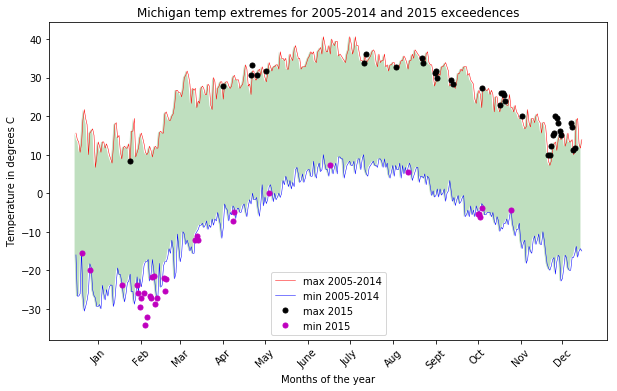

In [28]:
plt.rcParams["figure.figsize"] = (10,7)
fig = plt.figure()
ax = plt.axes()

# plot the linear data of max and min temps for 2005 - 2014
ax.plot(df5.index, df5['max'], color = 'red', label='max',linewidth=0.5)
ax.plot(df5.index, df5['min'], color = 'blue', label='min',linewidth=0.5)

plt.xlabel('Months of the year')
plt.ylabel('Temperature in degrees C')
plt.title('Michigan temp extremes for 2005-2014 and 2015 exceedences')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
#plt.legend(['Max 2005-2014', 'Min 2005-2014'])

# fill the area between the linear data and exponential data
plt.gca().fill_between(range(len(df5['max'])), 
                       df5['max'], df5['min'], 
                       facecolor='green', 
                       alpha=0.25)

#df5['max_2015_record'] = np.ma.masked_where(np.isnan(df5['max_2015_record']), df5['max_2015_record'])
# did not need to use above mask option, it eventually added the scatter dots for 2015, no idea why it didn't work before
# perhaps it has to do with it not wanting to plot NaN values directly to the plot but did so using the axes method

# add scatter plot of record extreme temps from 2015
ax.plot(df5.index, df5['max_2015_record'], 'ok', markersize=5)
ax.plot(df5.index, df5['min_2015_record'], 'om', markersize=5)

m = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
ticks = [(dt.date(2017,m,1)-dt.date(2016,12,15)).days for m in range(1,13)]
ax.set_xticks(ticks)
ax.set_xticklabels(m)

# rotate the tick labels for the x axis
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)

# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

plt.legend(['max 2005-2014', 'min 2005-2014', 'max 2015', 'min 2015'], loc='lower center')
fig.set_facecolor('white')
plt.show()

### Code below is copied from discussion sections for week 2 of the course

In [ ]:
# below code copied from discussion sections for week 2 of the course

# https://www.coursera.org/learn/python-plotting/discussions/forums/mUMJMOljEea2SAoyDBvSMA/threads/LRDR_J9wEeedFA69v7cROA
# then a sensible use of set_index, groupby and np.max & np.min agg functions can be useful.
# 5) I learned lots on the charting side (which I'm sure you will discover) - 
# but one useful little find for getting the plotting order useful was 
# 'zorder =  ' (lower z order items are plotted first).

#df['month'] = df.Date.dt.month

# https://www.coursera.org/learn/python-plotting/discussions/forums/mUMJMOljEea2SAoyDBvSMA/threads/c0HgpAE9Eei3jQ6MIqbwMA

#Arrange the days 0-365 as month

# import datetime as dt

# m = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
# # This is the vital step. It will create a list of day numbers corresponding to middle of each month i.e. 15(Jan), 46(Feb), ... 
# ticks = [(dt.date(2017,m,1)-dt.date(2016,12,15)).days for m in range(1,13)]
# # It is important to use a non-leap year for this calculation (I used 2017).
# # Also, I used (2016,12,15) to substract so that I get middle of each month rather than beginning, it just looks better that way.

# ax.set_xticks(ticks)
# ax.set_xticklabels(m)